# Sentiment Analysis (textacy)

Textacy Notebook

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import textacy
from collections import defaultdict
import re

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the GGP data

In [4]:
df = pd.read_csv('resources/scrape1_model_predictions.csv')

In [5]:
df.head()

date      user                        title  \
0  31 Jan 2022  JiffyBag                      RE: SAS   
1  31 Jan 2022  JiffyBag                      RE: SAS   
2  31 Jan 2022  rosso123  Newcrest pulling a fast one   
3  31 Jan 2022  JiffyBag   RE: Why would u short this   
4  31 Jan 2022  Philbrim                 Ups n downs.   

                                             comment     opinion  price  \
0  For me, it was just a fun exercise to do, and ...  No Opinion   13.8   
1  Hi Walkabout,I fully acknoweldege your rationa...  No Opinion   13.8   
2  NCM wants this 5% done and dusted asap, otherw...  No Opinion   13.8   
3  Merc,It would be fantastic if someone could ac...  No Opinion   13.8   
4  We go down 5% and most people are so volatile....  No Opinion   13.8   

     datetime                                      comment_clean  \
0  2022-01-31  for was just fun exercise and will have see wh...   
1  2022-01-31  walkabouti fully acknoweldege your rationale e...   
2  2022-01-31  ncm wants this done and dusted asap otherwise ...   
3  2022-01-31  mercit would fantastic someone could actually ...   
4  2022-01-31  down and most people are volatile and everyone...   

   predicted_opinion  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

## Sentiment Analysis using Sentiment Words csv

Load sentiment words

In [7]:
sen = pd.read_csv('resources/sentiment_words.csv')

In [8]:
sen['objectivity'] = 1. - (sen.pos_score + sen.neg_score)
sen['pos_vs_neg'] = sen.pos_score - sen.neg_score

In [9]:
sen_dict = defaultdict(dict) # set up a default dictionary with an empty dictionary as default value

for row in tqdm_notebook(sen.itertuples()):
    sen_dict[row.pos] [row.word] = {'objectivity': row.objectivity, 'pos_vs_neg': row.pos_vs_neg}

/Users/jamesmorley/opt/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

In [10]:
sen_dict

defaultdict(dict,
            {'adj': {'.22-caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.22-calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.22_caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.22_calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.38-caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.38-calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.38_caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.38_calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.45-caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.45-calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.45_caliber': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '.45_calibre': {'objectivity': 1.0, 'pos_vs_neg': 0.0},
              '0': {'objectivity': 0.5, 'pos_vs_neg': -0.5},
              '1': {'objectivity': 0.75, 'pos_vs_neg': -0.25},
           

In [11]:
def process_text(documents, pos=False):
    '''
    cleans sentences from stop words and punctuation and filters by pos tags if given
    returns cleaned sentence and tokenized sentence
    '''
    nlp = textacy.load_spacy_lang('en_core_web_sm')
    
    texts = []
    tokenised_texts = []

    if pos: # pos can either be False or a list of parts of speech
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ in pos
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
    
    
    else:    
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
            
    return texts, tokenised_texts

In [12]:
pos = ['noun', 'adj', 'verb', 'adv']

In [13]:
process_text(df['comment_clean'][:2], pos=pos)

/Users/jamesmorley/opt/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


0it [00:00, ?it/s]

/Users/jamesmorley/opt/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  del sys.path[0]


(['', ''], [[], []])

In [14]:
processed_quotes, tokenised_quotes = process_text(df['comment_clean'], pos=pos)

/Users/jamesmorley/opt/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


0it [00:00, ?it/s]

/Users/jamesmorley/opt/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  del sys.path[0]


In [15]:
df['processed_quote'] = processed_quotes
df['tokenised_quotes'] = tokenised_quotes

In [59]:
df.head()

user                        title  \
0  JiffyBag                      RE: SAS   
1  JiffyBag                      RE: SAS   
2  rosso123  Newcrest pulling a fast one   
3  JiffyBag   RE: Why would u short this   
4  Philbrim                 Ups n downs.   

                                             comment     opinion  price  \
0  For me, it was just a fun exercise to do, and ...  No Opinion   13.8   
1  Hi Walkabout,I fully acknoweldege your rationa...  No Opinion   13.8   
2  NCM wants this 5% done and dusted asap, otherw...  No Opinion   13.8   
3  Merc,It would be fantastic if someone could ac...  No Opinion   13.8   
4  We go down 5% and most people are so volatile....  No Opinion   13.8   

     datetime                                      comment_clean  \
0  2022-01-31  for me it was just a fun exercise to do and we...   
1  2022-01-31  hi walkabouti fully acknoweldege your rational...   
2  2022-01-31  ncm wants this done and dusted asap otherwise ...   
3  2022-01-31  mercit would be fantastic if someone could act...   
4  2022-01-31  we go down and most people are so volatile we ...   

                                     processed_quote  \
0  fun exercise information actually transpires u...   
1  walkabouti fully acknoweldege rationale etcmy ...   
2  wants dusted asap pay higher price simple asse...   
3  fantastic actually short dream know satisfying...   
4  people volatile best buddies board personally ...   

                                    tokenised_quotes  
0  [fun, exercise, information, actually, transpi...  
1  [walkabouti, fully, acknoweldege, rationale, e...  
2  [wants, dusted, asap, pay, higher, price, simp...  
3  [fantastic, actually, short, dream, know, sati...  
4  [people, volatile, best, buddies, board, perso...

In [60]:
def scorer(parsed):
    """
    Determines the average objectivity and positive-versus-negative scores 
    for a given sentence
    """
   
    obj_scores, pvn_scores = [], []
    for token in parsed:
        try:
            obj_scores.append(sen_dict[token.pos_][token.lemma_]['objectivity'])
            pvn_scores.append(sen_dict[token.pos_][token.lemma_]['pos_vs_neg'])
        except:
            pass
        
    # set default values if no token found
    if not obj_scores:
        obj_scores = [1.]
    if not pvn_scores:
        pvn_scores = [0.]
        
    return [np.mean(obj_scores), np.mean(pvn_scores)]

In [61]:
scores = df['tokenised_quotes'].map(scorer)
df['objectivity_avg'] = scores.map(lambda x: x[0])
df['polarity_avg'] = scores.map(lambda x: x[1])

In [63]:
df['quote_len'] = df.comment.map(lambda x: len(x.split()))
dfs = df[df.quote_len > 10]

In [66]:
dfs = dfs[dfs['opinion'] != 'No Opinion']

In [67]:
df.shape

(122597, 12)

In [68]:
dfs.shape

(13045, 12)

In [71]:
pos = ['Strong Buy', 'Buy']
neg = ['Sell', 'Strong Sell', 'Weak Sell', 'Hold', 'Weak Buy']

In [74]:
dfs['pos'] = ['pos' if i in pos else 'neg' for i in dfs.opinion]

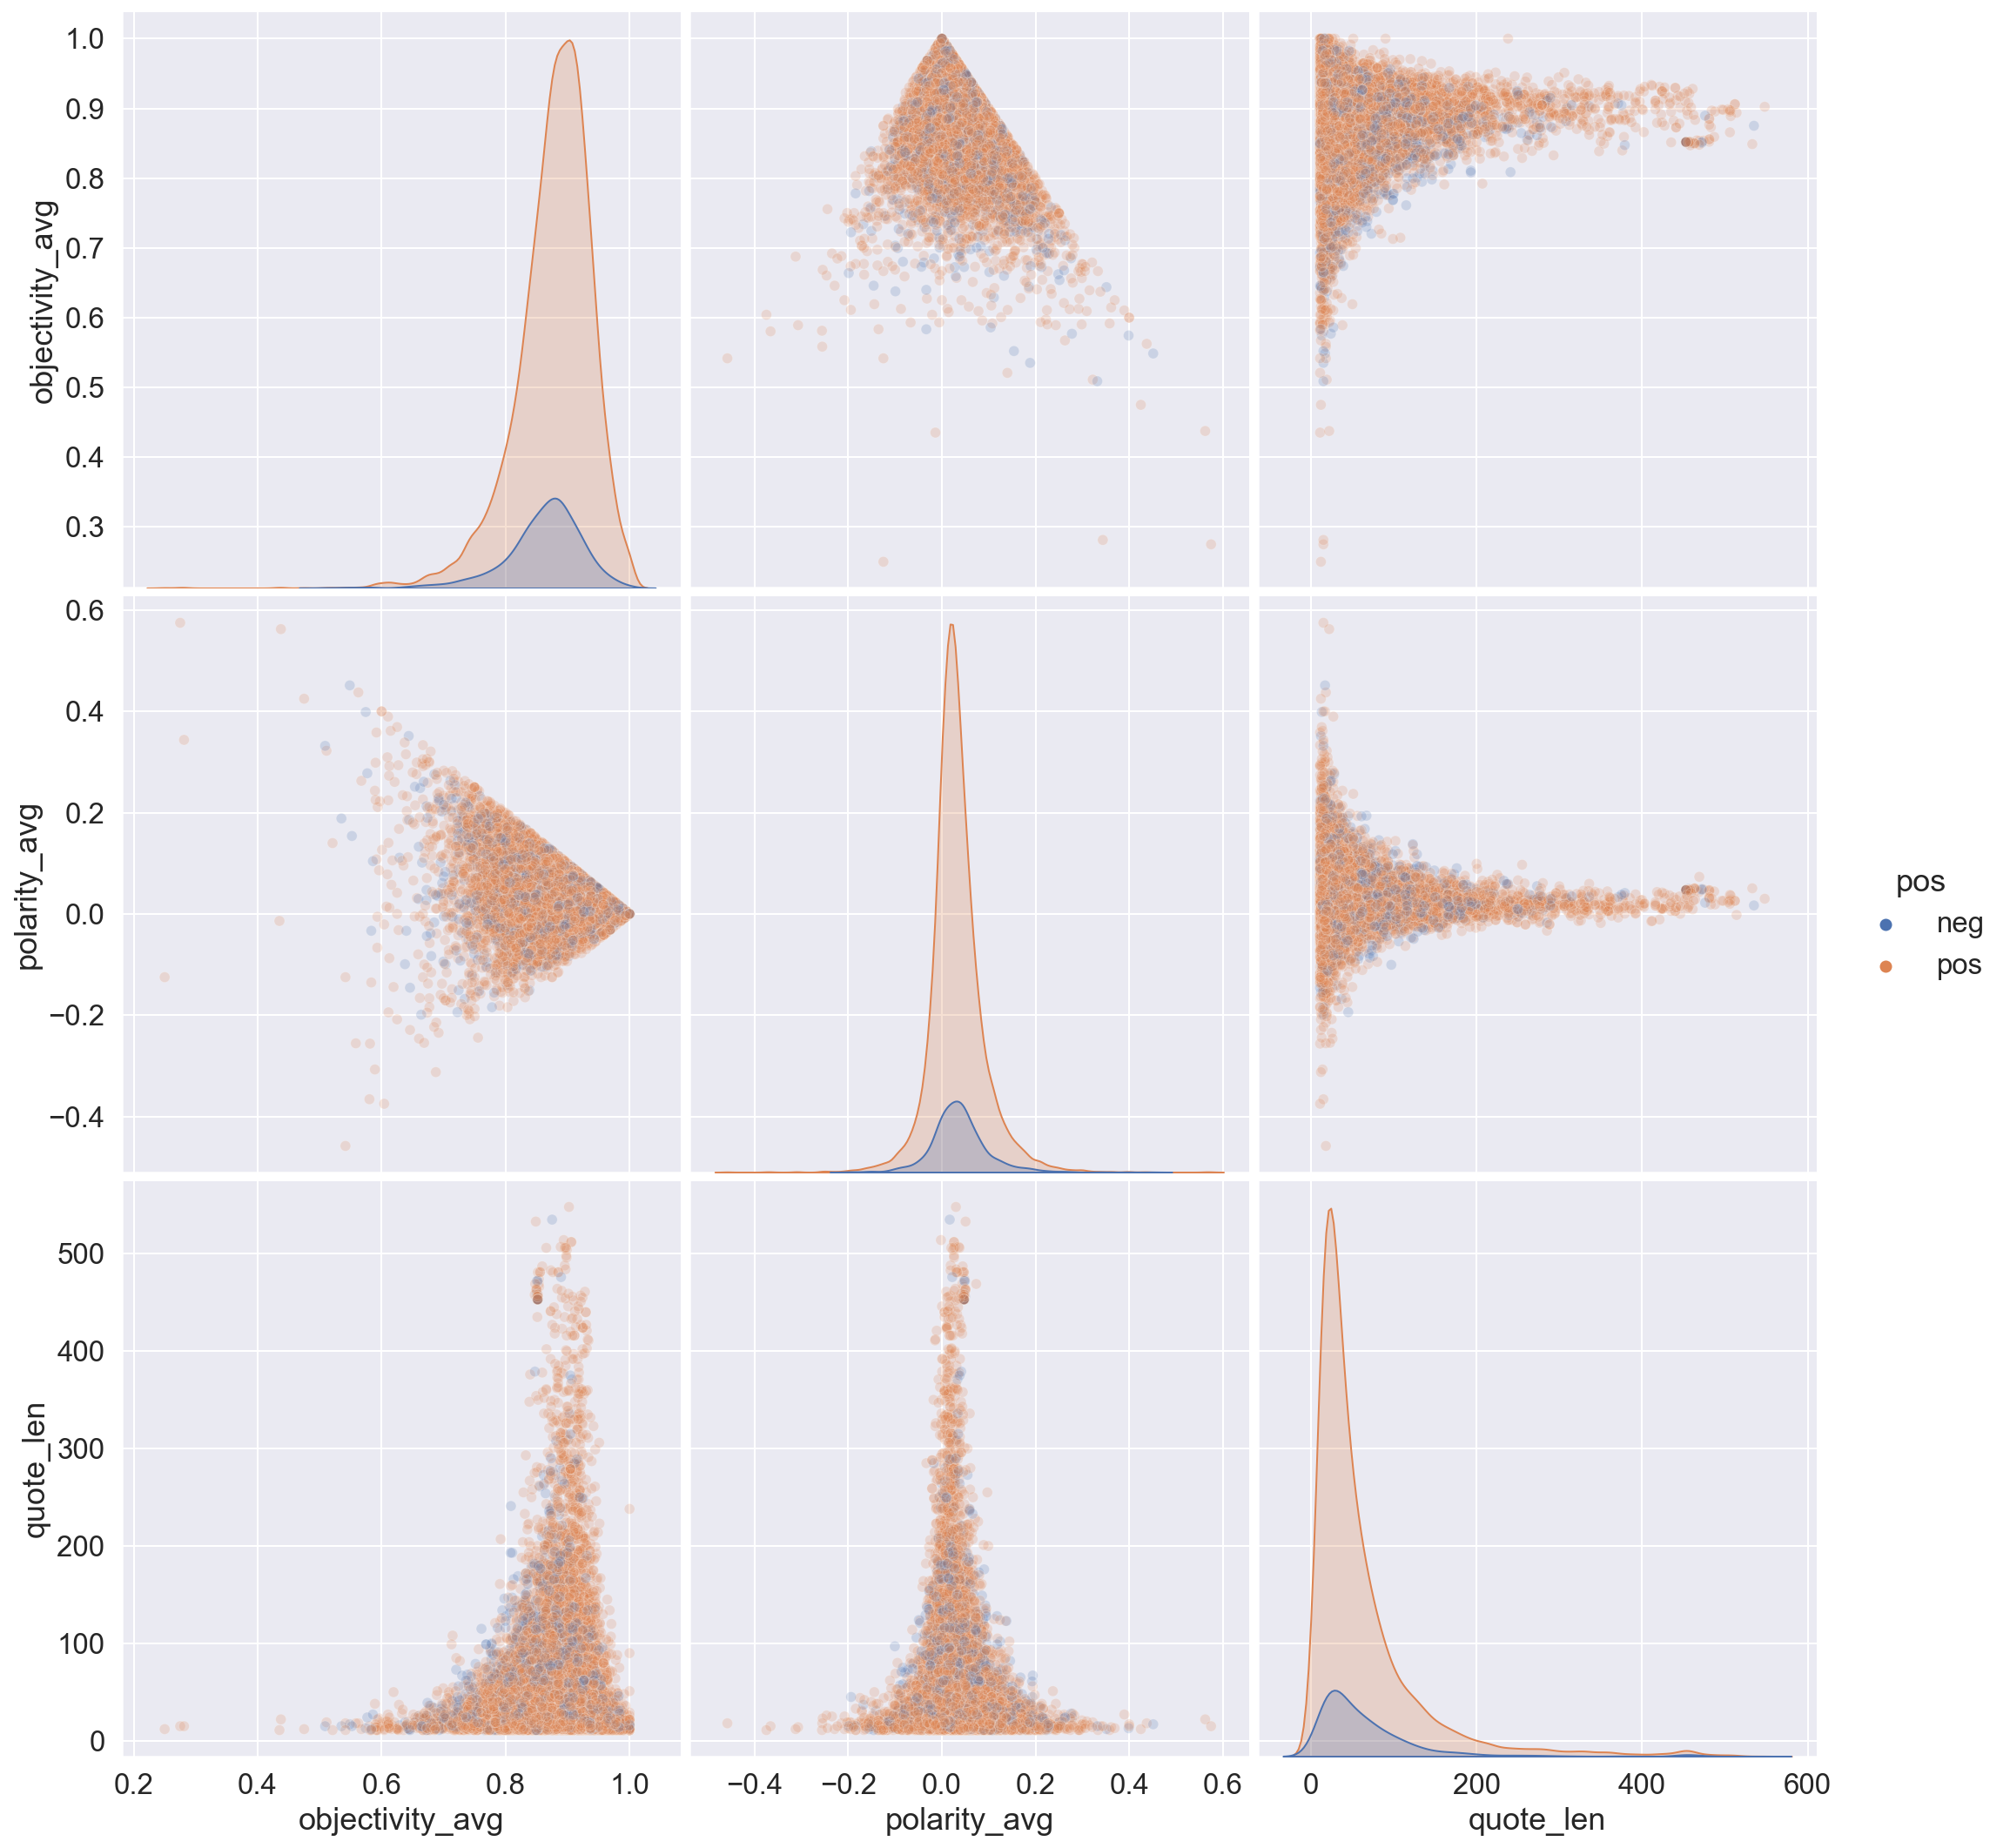

In [75]:
sns.pairplot(dfs, vars=['objectivity_avg', 'polarity_avg', 'quote_len'], hue='pos', 
             plot_kws={'alpha': 0.2}, height=5)
plt.show()

In [78]:
df.head()

user                        title  \
0  JiffyBag                      RE: SAS   
1  JiffyBag                      RE: SAS   
2  rosso123  Newcrest pulling a fast one   
3  JiffyBag   RE: Why would u short this   
4  Philbrim                 Ups n downs.   

                                             comment     opinion  price  \
0  For me, it was just a fun exercise to do, and ...  No Opinion   13.8   
1  Hi Walkabout,I fully acknoweldege your rationa...  No Opinion   13.8   
2  NCM wants this 5% done and dusted asap, otherw...  No Opinion   13.8   
3  Merc,It would be fantastic if someone could ac...  No Opinion   13.8   
4  We go down 5% and most people are so volatile....  No Opinion   13.8   

     datetime                                      comment_clean  \
0  2022-01-31  for me it was just a fun exercise to do and we...   
1  2022-01-31  hi walkabouti fully acknoweldege your rational...   
2  2022-01-31  ncm wants this done and dusted asap otherwise ...   
3  2022-01-31  mercit would be fantastic if someone could act...   
4  2022-01-31  we go down and most people are so volatile we ...   

                                     processed_quote  \
0  fun exercise information actually transpires u...   
1  walkabouti fully acknoweldege rationale etcmy ...   
2  wants dusted asap pay higher price simple asse...   
3  fantastic actually short dream know satisfying...   
4  people volatile best buddies board personally ...   

                                    tokenised_quotes  objectivity_avg  \
0  [fun, exercise, information, actually, transpi...         0.959764   
1  [walkabouti, fully, acknoweldege, rationale, e...         0.946414   
2  [wants, dusted, asap, pay, higher, price, simp...         0.860417   
3  [fantastic, actually, short, dream, know, sati...         0.723999   
4  [people, volatile, best, buddies, board, perso...         0.908541   

   polarity_avg  quote_len  
0      0.023401         50  
1      0.005866        154  
2      0.024200         68  
3      0.060552         26  
4      0.038820         77

In [76]:
# view the top 10 comments for polarity ie the most positive

for quote in dfs.sort_values('polarity_avg', ascending=False)['comment'][0:10]:
    print(quote)
    print('============================================================\n')

Like that, nice one.Will we get a Tuesday RNS ? It's been a while :))

Wasred, I have to agreeA poet I never will beAlthough thereâs no guaranteeAnd no-one can really foreseeJust how successful will be GGP?

Merry Christmas all. Everyone here is happy.  Of all the aim we are lucky to be here.

Redirons, I would reckon he is 1oz in 20million oz, and we are very lucky to have him.GLA

Thanks TigMorecombe and Wise ?I take it you enjoyed it then :))

Hi SamplankYou can call me what you like :))Everyone on Wsbn are at the moment:))Am I bovvered

Hi Speedy,Confirming that I would like one of these too as and when available.Many thanks,Curdy

Good luck to you in whatever you do next TMT - best regards.

BUY buy buy. BUY buy buy BUY buy buy BUY buy buy buy . goodbye Sorter's Don't cryfor those that don't remember Mary Hopkins 1969 Lol ATB

And that must go down as one of the best rants - ever.



In [77]:
# view the bottom 10 comments for polarity ie the most negative

for quote in dfs.sort_values('polarity_avg', ascending=True)['comment'][0:10]:
    print(quote)
    print('============================================================\n')

Apologies it was HNR but bottom drawered it and now itâs in profit.MYbe PRIM can do the same

Canât wait for Monday. It is sad but I hate weekends.

Can see why you are called Marmite! You either like it or you hate it.

first hour always manic on a monday rnslift off soonwell done LTHs

Cup half empty Monty, sorry empty. I don't have to be negative short termATBViking

Oh, no: now I'll be mesmerised by the ask as well!

Merc. That are pathetic and so dim that they think we canât see through them. Embarrassed for them.

Canât see that GDXJ would sell at this price and the volume is really stagnant. Could be wrong but I just canâtSee it.

Timeserved I think you are a very disruptive negative poster and one not to be trusted.You give nothing to this board!!You are not wanted here !!!

Just had an earthquake here. Anything to do with 17 getting hit. lolGLA



### Using Vader Sentiment Analyzer

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [112]:
dfs.opinion.value_counts()

Strong Buy     10781
Hold            1756
Buy              483
Sell               9
Weak Buy           9
Strong Sell        5
Weak Sell          2
Name: opinion, dtype: int64

In [114]:
dfs[dfs['opinion'] == 'Strong Sell']

user                      title  \
15285         wasred15              What the Hell   
22596         xeverton               RE: Newcrest   
45470       DStrat1274    Carrying heavy bags....   
75545         IndyNial  RE: Valueing the deposit.   
105427  EnricoPallazzo                    RE: 11p   

                                                  comment      opinion  price  \
15285   Here we go with your 3-6 posts '1 month old do...  Strong Sell  17.45   
22596   Hydrogen, really donât know why you have to ...  Strong Sell  16.10   
45470   under water with paper hands?  Then y'all know...  Strong Sell  21.65   
75545   Don't beat yourself up Sproutsdave, it's an ea...  Strong Sell  28.05   
105427  Roger that! To improve the effectiveness of th...  Strong Sell  16.95   

          datetime                                      comment_clean  \
15285   2021-11-01  here we go with your posts month old dodge acc...   
22596   2021-09-29  hydrogen really dont know why you have to just...   
45470   2021-04-14  under water with paper hands then yall know wh...   
75545   2020-12-11  dont beat yourself up sproutsdave its an easy ...   
105427  2020-09-09  roger that to improve the effectiveness of thi...   

                                          processed_quote  \
15285   posts month old account long believe spreading...   
22596   hydrogen know justify nuisance appears enjoy c...   
45470                        water paper hands know blame   
75545   beat sproutsdave easy mistake actually ate spr...   
105427  improve effectiveness procedure set opinion st...   

                                         tokenised_quotes  objectivity_avg  \
15285   [posts, month, old, account, long, believe, sp...         0.851729   
22596   [hydrogen, know, justify, nuisance, appears, e...         0.790936   
45470                  [water, paper, hands, know, blame]         0.898647   
75545   [beat, sproutsdave, easy, mistake, actually, a...         0.828100   
105427  [improve, effectiveness, procedure, set, opini...         0.815391   

        polarity_avg  quote_len  pos  
15285       0.047148        453  neg  
22596       0.101763         57  neg  
45470      -0.006331         11  neg  
75545       0.019712         38  neg  
105427      0.066484         21  neg

In [119]:
vader.polarity_scores(dfs.comment_clean[105427])

{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.7351}

In [120]:
vader.polarity_scores(dfs.processed_quote[105427])

{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7351}

In [121]:
vader_scores = df['processed_quote'].map(vader.polarity_scores)

In [129]:
vader_scores

<122597x4 sparse matrix of type '<class 'numpy.float64'>'
	with 490388 stored elements in Compressed Sparse Row format>

In [96]:
from sklearn.feature_extraction import DictVectorizer

In [123]:
dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

<122597x4 sparse matrix of type '<class 'numpy.float64'>'
	with 490388 stored elements in Compressed Sparse Row format>

In [130]:
dvec.feature_names_

['compound', 'neg', 'neu', 'pos']

In [125]:
for i, col in enumerate(dvec.feature_names_):
    df['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

In [126]:
df

user                        title  \
0             JiffyBag                      RE: SAS   
1             JiffyBag                      RE: SAS   
2             rosso123  Newcrest pulling a fast one   
3             JiffyBag   RE: Why would u short this   
4             Philbrim                 Ups n downs.   
...                ...                          ...   
122593     WelshFalcon                RE: Diversify   
122594          panama                RE: Diversify   
122595  EnricoPallazzo                 Bid dropping   
122596          Dip666                RE: Diversify   
122597  EnricoPallazzo         RE: Satellite Update   

                                                  comment     opinion  price  \
0       For me, it was just a fun exercise to do, and ...  No Opinion   13.8   
1       Hi Walkabout,I fully acknoweldege your rationa...  No Opinion   13.8   
2       NCM wants this 5% done and dusted asap, otherw...  No Opinion   13.8   
3       Merc,It would be fantastic if someone could ac...  No Opinion   13.8   
4       We go down 5% and most people are so volatile....  No Opinion   13.8   
...                                                   ...         ...    ...   
122593  My thoughts on GGP vs others in the area is ve...  No Opinion   12.1   
122594  Good luck QF and you being quite Frank here so...  No Opinion   12.1   
122595  Another big buy just under 12p must be filled ...  Strong Buy   12.1   
122596  Hi QF, From another perspective, it might be r...  No Opinion   12.1   
122597  Thanks a lot! Powering ahead towards another s...  Strong Buy   12.1   

          datetime                                      comment_clean  \
0       2022-01-31  for me it was just a fun exercise to do and we...   
1       2022-01-31  hi walkabouti fully acknoweldege your rational...   
2       2022-01-31  ncm wants this done and dusted asap otherwise ...   
3       2022-01-31  mercit would be fantastic if someone could act...   
4       2022-01-31  we go down and most people are so volatile we ...   
...            ...                                                ...   
122593  2020-06-24  my thoughts on ggp vs others in the area is ve...   
122594  2020-06-24  good luck qf and you being quite frank here so...   
122595  2020-06-24  another big buy just under p must be filled at...   
122596  2020-06-24  hi qf from another perspective it might be reg...   
122597  2020-06-24  thanks a lot powering ahead towards another se...   

                                          processed_quote  \
0       fun exercise information actually transpires u...   
1       walkabouti fully acknoweldege rationale etcmy ...   
2       wants dusted asap pay higher price simple asse...   
3       fantastic actually short dream know satisfying...   
4       people volatile best buddies board personally ...   
...                                                   ...   
122593  thoughts ggp area simplisticyes trucking dista...   
122594  good luck frank good thatlike mushroom growing...   
122595  big buy p filled moment bid dropped ask stayin...   
122596  perspective regarded feel late party ggp takin...   
122597  thanks lot powering ahead set brilliant result...   

                                         tokenised_quotes  objectivity_avg  \
0       [fun, exercise, information, actually, transpi...         0.959764   
1       [walkabouti, fully, acknoweldege, rationale, e...         0.946414   
2       [wants, dusted, asap, pay, higher, price, simp...         0.860417   
3       [fantastic, actually, short, dream, know, sati...         0.723999   
4       [people, volatile, best, buddies, board, perso...         0.908541   
...                                                   ...              ...   
122593  [thoughts, ggp, area, simplisticyes, trucking,...         0.902830   
122594  [good, luck, frank, good, thatlike, mushroom, ...         0.842566   
122595  [big, buy, p, filled, moment, bid, dropped, as...         0.889746   
122596

### Output to csv...

In [128]:
# df.to_csv('resources/sentiments.csv', index=False)